# start of Example

In [1]:
rm(list=ls())
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libBLAS.dylib
LAPACK: /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libLAPACK.dylib

locale:
[1] ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/ko_KR.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.4.3  magrittr_1.5    IRdisplay_0.4.4 pbdZMQ_0.3-0   
 [5] tools_3.4.3     crayon_1.3.4    uuid_0.1-2      stringi_1.1.6  
 [9] IRkernel_0.8.11 jsonlite_1.5    stringr_1.2.0   digest_0.6.13  
[13] repr_0.12.0     evaluate_0.10.1

# Read Data

In [10]:
library(data.table)

raw <- fread('./data/공공데이터포탈_건강검진정보_2018/NHIS_OPEN_GJ_2015/NHIS_OPEN_GJ_2015.CSV')

# Describe Data

In [12]:
head(raw)

기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),⋯,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
2015,1,2,15,45,155,60,88,0.6,0.7,⋯,1.1,17,28,23,1,1,0,NA,NA,20161220
2015,2,2,15,11,155,65,98,1.2,0.6,⋯,1.0,25,30,41,1,1,1,NA,0,20161220
2015,3,2,11,26,155,65,85,1.2,0.9,⋯,0.6,18,16,25,1,0,0,NA,NA,20161220
2015,4,1,9,41,175,75,89,0.2,0.2,⋯,0.9,28,40,50,1,1,1,0,NA,20161220
2015,5,1,16,47,160,50,78,0.5,0.6,⋯,1.0,20,13,19,2,0,1,NA,0,20161220
2015,6,1,11,26,170,60,74,1.0,0.8,⋯,0.9,22,16,12,1,1,0,NA,NA,20161220


In [18]:
tail(raw, 3)

기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),⋯,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
2015,999998,1,13,42,165,70,94,0.9,0.9,⋯,0.9,19,20,75,3,0,0,NA,NA,20161220
2015,999999,1,12,28,175,65,82,0.6,0.7,⋯,1.1,25,20,30,3,1,0,NA,NA,20161220
2015,1000000,1,11,11,160,65,84,0.4,0.2,⋯,1.0,29,37,33,2,1,0,NA,NA,20161220


In [13]:
nrow(raw)

[1] 1000000

In [14]:
ncol(raw)

[1] 31

In [15]:
dim(raw)

[1] 1000000      31

In [17]:
names(raw)
colnames(raw)

[1] "기준년도"            "가입자일련번호"      "성별코드"           
 [4] "연령대코드(5세단위)" "시도코드"            "신장(5Cm단위)"      
 [7] "체중(5Kg 단위)"      "허리둘레"            "시력(좌)"           
[10] "시력(우)"            "청력(좌)"            "청력(우)"           
[13] "수축기혈압"          "이완기혈압"          "식전혈당(공복혈당)" 
[16] "총콜레스테롤"        "트리글리세라이드"    "HDL콜레스테롤"      
[19] "LDL콜레스테롤"       "혈색소"              "요단백"             
[22] "혈청크레아티닌"      "(혈청지오티)AST"     "(혈청지오티)ALT"    
[25] "감마지티피"          "흡연상태"            "음주여부"           
[28] "구강검진 수검여부"   "치아우식증유무"      "치석유무"           
[31] "데이터 기준일자"

[1] "기준년도"            "가입자일련번호"      "성별코드"           
 [4] "연령대코드(5세단위)" "시도코드"            "신장(5Cm단위)"      
 [7] "체중(5Kg 단위)"      "허리둘레"            "시력(좌)"           
[10] "시력(우)"            "청력(좌)"            "청력(우)"           
[13] "수축기혈압"          "이완기혈압"          "식전혈당(공복혈당)" 
[16] "총콜레스테롤"        "트리글리세라이드"    "HDL콜레스테롤"      
[19] "LDL콜레스테롤"       "혈색소"              "요단백"             
[22] "혈청크레아티닌"      "(혈청지오티)AST"     "(혈청지오티)ALT"    
[25] "감마지티피"          "흡연상태"            "음주여부"           
[28] "구강검진 수검여부"   "치아우식증유무"      "치석유무"           
[31] "데이터 기준일자"

# Selecting or Keeping Columns

In [19]:
dat1 <- raw[,"신장(5Cm단위)"]
head(dat1)

신장(5Cm단위)
155
155
155
175
160
170


In [20]:
dat1 <- raw[,c("신장(5Cm단위)")]
head(dat1)

신장(5Cm단위)
155
155
155
175
160
170


In [21]:
dat1 <- raw[,c("신장(5Cm단위)"), with=FALSE]
head(dat1)

신장(5Cm단위)
155
155
155
175
160
170


In [22]:
dat2 <- raw[,6, with=FALSE]
head(dat2)

신장(5Cm단위)
155
155
155
175
160
170


In [23]:
dat3 <- raw[,.(기준년도, 허리둘레)]
head(dat3)

기준년도,허리둘레
2015,88
2015,98
2015,85
2015,89
2015,78
2015,74


### Keeping multiple columns based on column position

In [24]:
dat4 <- raw[,c(1,3, 5:8)]
head(dat4)

기준년도,성별코드,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레
2015,2,45,155,60,88
2015,2,11,155,65,98
2015,2,26,155,65,85
2015,1,41,175,75,89
2015,1,47,160,50,78
2015,1,26,170,60,74


### Dropping Multiple Columns

In [25]:
dat5 <- raw[,!c(1,3, 5:8)]
head(dat5)

가입자일련번호,연령대코드(5세단위),시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,⋯,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
1,15,0.6,0.7,1,2,112,74,180,169,⋯,1.1,17,28,23,1,1,0,NA,NA,20161220
2,15,1.2,0.6,1,1,130,80,179,162,⋯,1.0,25,30,41,1,1,1,NA,0,20161220
3,11,1.2,0.9,1,1,107,65,206,182,⋯,0.6,18,16,25,1,0,0,NA,NA,20161220
4,9,0.2,0.2,1,1,120,80,110,168,⋯,0.9,28,40,50,1,1,1,0,NA,20161220
5,16,0.5,0.6,2,2,89,46,104,197,⋯,1.0,20,13,19,2,0,1,NA,0,20161220
6,11,1.0,0.8,1,1,120,80,96,146,⋯,0.9,22,16,12,1,1,0,NA,NA,20161220


### Rename Variable

In [26]:
setnames(raw, c("신장(5Cm단위)", "체중(5Kg 단위)"), c("height", "weight"))
head(raw)

기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,height,weight,허리둘레,시력(좌),시력(우),⋯,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
2015,1,2,15,45,155,60,88,0.6,0.7,⋯,1.1,17,28,23,1,1,0,NA,NA,20161220
2015,2,2,15,11,155,65,98,1.2,0.6,⋯,1.0,25,30,41,1,1,1,NA,0,20161220
2015,3,2,11,26,155,65,85,1.2,0.9,⋯,0.6,18,16,25,1,0,0,NA,NA,20161220
2015,4,1,9,41,175,75,89,0.2,0.2,⋯,0.9,28,40,50,1,1,1,0,NA,20161220
2015,5,1,16,47,160,50,78,0.5,0.6,⋯,1.0,20,13,19,2,0,1,NA,0,20161220
2015,6,1,11,26,170,60,74,1.0,0.8,⋯,0.9,22,16,12,1,1,0,NA,NA,20161220


### subsetting Rows/Filtering

In [27]:
dat5 <- raw[성별코드 == "1"]
head(dat5)

기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,height,weight,허리둘레,시력(좌),시력(우),⋯,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
2015,4,1,9,41,175,75,89,0.2,0.2,⋯,0.9,28,40,50,1,1,1,0,NA,20161220
2015,5,1,16,47,160,50,78,0.5,0.6,⋯,1.0,20,13,19,2,0,1,NA,0,20161220
2015,6,1,11,26,170,60,74,1.0,0.8,⋯,0.9,22,16,12,1,1,0,NA,NA,20161220
2015,7,1,10,44,180,90,94,0.7,0.8,⋯,0.8,66,61,152,3,0,1,0,NA,20161220
2015,10,1,6,26,185,90,81,1.5,1.5,⋯,0.9,20,22,41,3,0,1,0,0,20161220
2015,14,1,18,30,160,60,85,0.7,0.6,⋯,1.1,28,20,43,3,1,1,NA,0,20161220


[1] 538063      1

[1] 538063      1

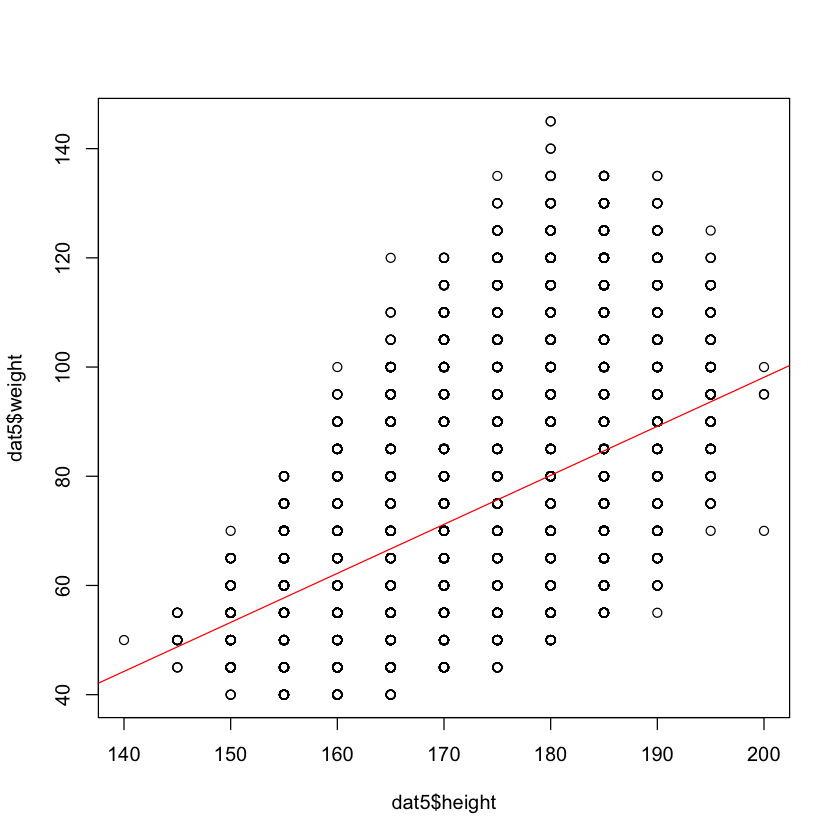

In [28]:
dim(dat5[,"height"])
dim(dat5[,"weight"])
plot(dat5$height, dat5$weight)
abline(lm(weight ~ height, data= dat5), col='red')

In [46]:
# 단일표본 t검정
t.test(dat5$weight)
weight_Ttest <- t.test(dat5$weight, alternative = "two.sided", mu = 70)


	One Sample t-test

data:  dat5$weight
t = 4855.9, df = 538060, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 73.47108 73.53042
sample estimates:
mean of x 
 73.50075 


---

# nonlinear regression
> * Convex Regression Model
> * https://www.jstor.org/stable/2281132?seq=1#page_scan_tab_contents

In [7]:
sessionInfo()

R version 3.4.3 (2017-11-30)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS High Sierra 10.13.5

Matrix products: default
BLAS: /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libBLAS.dylib
LAPACK: /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libLAPACK.dylib

locale:
[1] ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/ko_KR.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.4.3  magrittr_1.5    IRdisplay_0.4.4 pbdZMQ_0.3-0   
 [5] tools_3.4.3     crayon_1.3.4    uuid_0.1-2      stringi_1.1.6  
 [9] IRkernel_0.8.11 jsonlite_1.5    stringr_1.2.0   digest_0.6.13  
[13] repr_0.12.0     evaluate_0.10.1